import mlpfinace as mpf

In [ ]:
import mplfinance as mpf
import pandas as pd
import numpy as np

In [ ]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
%matplotlib inline
import pandas as pd
pd.__version__  # for the record
import mplfinance as mpf
mpf.__version__

c:\github\TradingGym\tvenv\lib\site-packages\setuptools\distutils_patch.py:25: UserWarning: Distutils was imported before Setuptools. This usage is discouraged and may exhibit undesirable behaviors or errors. Please use Setuptools' objects directly or at least import Setuptools first.
  warnings.warn(


initial done:
observation_list:['open', 'high', 'low', 'close', 'minute', 'hour', 'day', 'macd', 'boll_ub', 'boll_lb', 'rsi_30', 'dx_30', 'close_30_sma', 'close_60_sma']
 assets:['GBPUSD']
 time serial: 2017-05-29 00:00:00 -> 2017-06-02 23:55:00 length: 1440
plotting...


c:\github\TradingGym\tvenv\lib\site-packages\mplfinance\_arg_validators.py:35: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


--- running time: 4.277626991271973---


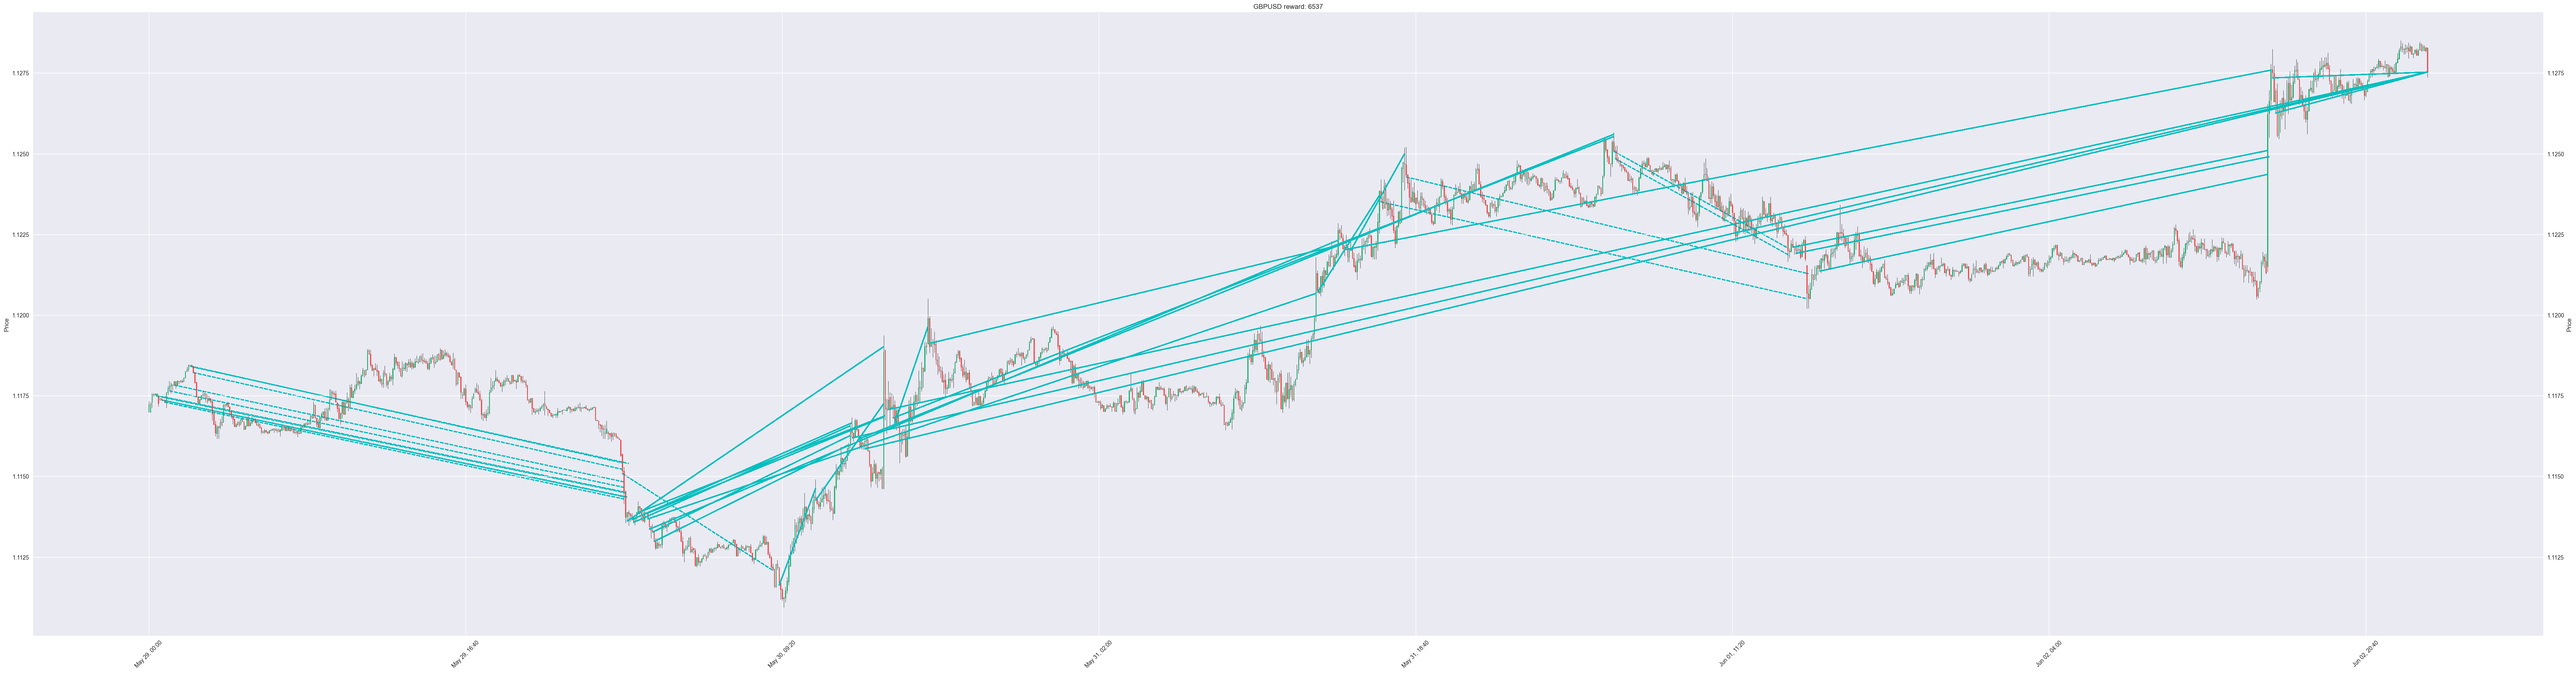

In [1]:
import pandas as pd
from environments.forex_trading import tgym
import time
import datetime
from stable_baselines3 import PPO
from stable_baselines3.common.env_util import make_vec_env
file ="./data/split/GBPUSD/weekly/GBPUSD_2017_21.csv"
df = pd.read_csv(file)
t = tgym(df,env_config_file='./data/config/gdbusd-test-1.json' )

# if model: del model # remove to demonstrate saving and loading
model_name='./data/models/GBPUSD-week-20211025224025'
model = PPO.load(model_name)

start_time = time.time()
obs = t.reset()
t.current_step=0
done = False
while not done:
    action, _states = model.predict(obs)
    obs, rewards, done, info = t.step(action)
    t.render(mode='graph')
print(f"--- running time: {(time.time() - start_time)}---")

In [ ]:
from environments.render.plot_chart import TradingChart
pd.set_option('display.max_columns', None)
p =TradingChart(t.df, t.transaction_history)
_ohlc = p.ohlc.query(f'symbol=="GBPUSD"')

In [ ]:
s ="GBPUSD"
pp = TradingChart1(t.df,t.transaction_history)
_wlines, _wcolors,_llines, _lcolors,rewards = pp.transaction_line("GBPUSD")
_wseq = dict(alines=_wlines, colors=_wcolors)
_lseq = dict(alines=_llines, colors=_lcolors, linestyle='--')
_ohlc = pp.ohlc.query(f'symbol=="{s}"')

In [ ]:
parameters = {"figscale":6.0,"style":"nightclouds", "type":"hollow_and_filled", "warn_too_much_data":2000 }
_seq = dict(alines=_lines, colors=_colors, linestyle =_linestyle )
_ohlc = p.ohlc.query(f'symbol=="{s}"')
mpf.plot(_ohlc, alines=_seq, **parameters, title =f'{s} reward: {rewards}')

In [ ]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 20)
dh = pd.DataFrame(t.transaction_history)
# dh.index = pd.DatetimeIndex(dh['ActionTime'])
ohlc = df[['time', 'open', 'high', 'low', 'close']].copy()
ohlc = ohlc.rename(columns={'time':'Date','open':'Open','high':'High','low':'Low','close':'Close'})


In [ ]:
s = mpf.make_mpf_style(base_mpl_style='seaborn',rc={'axes.grid':True})
fig = mpf.figure(style=s,figsize=(80,20))
ax1 = fig.subplot()
ax2 = ax1.twinx()
mpf.plot(_ohlc, alines=_lseq ,ax=ax1,type='ohlc',style='default')
mpf.plot(_ohlc,alines=_wseq, ax=ax2,type='candle',style='yahoo',axtitle=f'{s} reward: {rewards}')



In [ ]:
l=dh[['ActionTime', 'ActionPrice', 'Type', 'ClosePrice','CloseTime']].copy()
buy= l.query('Type==0.0 & ClosePrice > 0.0')
sell = l.query('Type==1.0 & ClosePrice > 0.0')
close = l.query('ClosePrice > 0.0')

In [ ]:
mks=pd.merge(ohlc,buy, how='left',left_on=['Date'],right_on=['ActionTime'])
mks.drop(columns=['ActionTime', 'Type'],inplace=True)
mks.rename(columns={'ActionPrice':'Buy','ClosePrice':'CloseBuy','CloseTime':'CloseBuyTime'},inplace=True)

mks1=pd.merge(mks,sell, how='left',left_on=['Date'],right_on=['ActionTime'])
mks1.drop(columns=['ActionTime', 'Type'],inplace=True)
mks1.rename(columns={'ActionPrice':'Sell','ClosePrice':'CloseSell','CloseTime':'CloseSellTime'},inplace=True)

mks2=pd.merge(mks1,close, how='left',left_on=['Date'],right_on=['CloseTime'])
mks2.drop(columns=['ActionTime','ActionPrice','Type'],inplace=True)
pd.set_option('display.max_rows', 200)
mks2

In [ ]:
# 1. ohlc
# size, and style
# s = mpf.make_mpf_style(base_mpf_style='charles', rc={'font.size': 6})
# fig = mpf.figure(figsize=(120, 40), style=s) # pass in the self defined style to the whole canvas

# ax = fig.add_subplot(1,1,1) # main candle stick chart subplot, you can also pass in the self defined style here only for this subplot
# av = fig.add_subplot(2,1,2, sharex=ax)  # volume chart subplot
# av = fig.add_subplot(2,1,2, sharex=ax)  # volume chart subplot
# mpf.plot(ohlc, type='candle', ax=ax,  warn_too_much_data=2000)
# 2. open marker [sell v, buy ^, limit-sell v, limit-buy ^]
#p['Buy'] = np.where((p['Type']==1.0) & (p['LimitStep'] == 0.0), p["ActionPrice"], np.nan)
#p['BuyLimit'] = np.where((p['Type']==1.0) & (p['LimitStep'] > 0.0), p["ActionPrice"], np.nan)
#p['Sell'] = np.where((p['Type']==2.0) & (p['LimitStep'] == 0.0), p["ActionPrice"], np.nan)
#p['SellLimit'] = np.where((p['Type']==2.0) & (p['LimitStep'] > 0.0), p["ActionPrice"], np.nan)
ohlc.index = pd.DatetimeIndex(ohlc['Date'])
mks2.index = pd.DatetimeIndex(mks2['Date'])
sell_v = mpf.make_addplot(mks2["Sell"], type='scatter', marker='^', markersize=40, panel=0, color = 'yellow')
buy_v = mpf.make_addplot(mks2["Buy"], type='scatter', marker='v', markersize=40, panel=0, color = 'blue')
close_v = mpf.make_addplot(mks2["ClosePrice"], type='scatter', marker='x', markersize=40, panel=0, color = 'red')
plt =[sell_v,buy_v, close_v]
#sell_v = mpf.make_addplot(p["Sell"], type='scatter', marker='^', markersize=20, panel=0, color = 'pink')
#sell_limit_v = mpf.make_addplot(p["SellLimit"], type='scatter', marker='x', markersize=20, panel=0, color = 'pink')
#buy_v = mpf.make_addplot(p["Buy"], type='scatter', marker='v', markersize=20, panel=0, color = 'blue')
#buy_limit_v = mpf.make_addplot(p["BuyLimit"], type='scatter', marker='x', markersize=20, panel=0, color = 'blue')
parameters = {"figscale":6.0,"style":"nightclouds", "type":"hollow_and_filled", "warn_too_much_data":2000 }
seq = dict(alines=_lines, colors=_colors)
mpf.plot(ohlc, alines=seq, **parameters, savefig='test.png')

#    close marker [x] and redline from open->close if lose or green line agin


In [ ]:
import mplfinance as mpf
import pandas as pd
import datetime

class TradingChart1():
    """An ohlc trading visualization using matplotlib made to render tgym environment"""
    def __init__(self, df, transaction_history, **kwargs):
        self.ohlc = df[['_time','open','high','low','close','symbol']].copy()
        self.ohlc = self.ohlc.rename(columns={'_time':'Date','open':'Open','high':'High','low':'Low','close':'Close'})
        self.ohlc.index = pd.DatetimeIndex(self.ohlc['Date'])
        self.transaction_history = transaction_history
        self.parameters = {"figscale":6.0,"style":"nightclouds", "type":"hollow_and_filled", "warn_too_much_data":2000 }
        self.symbols = self.ohlc['symbol'].unique()
    def transaction_line(self, symbol):
        _wlines=[]
        _wcolors=[]
        _llines=[]
        _lcolors=[]

        rewards = 0
        for tr in self.transaction_history:
            if tr["Symbol"] == symbol : 
                rd = tr['Reward']  
                rewards += rd
                if tr['ClosePrice'] > 0 :
                    if tr['Type'] == 0 :
                        if rd > 0 :
                            _wlines.append([(tr['ActionTime'],tr['ActionPrice']),(tr['CloseTime'],tr['ClosePrice'])])
                            _wcolors.append('c')
                            
                        else:
                            _llines.append([(tr['ActionTime'],tr['ActionPrice']),(tr['CloseTime'],tr['ClosePrice'])])
                            _lcolors.append('r')
                    elif tr['Type'] == 1 :
                        if rd > 0 :
                            _wlines.append([(tr['ActionTime'],tr['ActionPrice']),(tr['CloseTime'],tr['ClosePrice'])])
                            _wcolors.append('c')
                        else:
                            _llines.append([(tr['ActionTime'],tr['ActionPrice']),(tr['CloseTime'],tr['ClosePrice'])])
                            _lcolors.append('r')
        return _wlines, _wcolors,_llines, _lcolors, rewards
    
    def plot(self):
        for s in self.symbols:
            s = mpf.make_mpf_style(base_mpl_style='seaborn',rc={'axes.grid':True})
            fig = mpf.figure(style=s,figsize=(20,6))
            ax1 = fig.subplot()
            ax2 = ax1.twinx()
            _wlines, _wcolors,_llines, _lcolors, rewards = self.transaction_line(s)
            _wseq = dict(alines=_wlines, colors=_wcolors)
            _lseq = dict(alines=_llines, colors=_lcolors, linestyle='-.')
            print(_wseq)
            print(_lseq)
            _ohlc = self.ohlc.query(f'symbol=="{s}"')
            mpf.plot(_ohlc, alines=_wseq, ax=ax1)
            mpf.plot(_ohlc, alines=_lseq, ax=ax2)
            fig.savefig(f'./data/log/{s}-{datetime.datetime.now().strftime("%Y%m%d%H%M%S")}')
            fig.title( f'{s} reward: {rewards}')


In [ ]:
s='GBPUSD'
_wlines, _wcolors,_llines, _lcolors, rewards = p.transaction_line(s)
_wseq = dict(alines=_wlines, colors=_wcolors)
_lseq = dict(alines=_llines, colors=_lcolors, linestyle='-.')


In [ ]:
s = mpf.make_mpf_style(base_mpl_style='seaborn',rc={'axes.grid':False})
fig = mpf.figure(style=s,figsize=(7.5,5.75))
ax1 = fig.subplot()
ax2 = ax1.twinx()
mpf.plot(_ohlc, alines=_lseq ,ax=ax1,type='ohlc',style='yahoo')
mpf.plot(_ohlc,alines=_wseq, ax=ax2,type='candle',style='yahoo')

s = mpf.make_mpf_style(base_mpl_style='seaborn',rc={'axes.grid':True})
fig = mpf.figure(style=s,figsize=(20,6))
ax1 = fig.subplot()
ax2 = ax1.twinx()
_ohlc = p.ohlc.query(f'symbol=="{s}"')
# mpf.plot(_ohlc, alines=_wseq, ax=ax1)
mpf.plot(_ohlc, alines=_lseq, ax=ax2)
fig.savefig(f'./data/log/{s}-{datetime.datetime.now().strftime("%Y%m%d%H%M%S")}')
fig.title( f'{s} reward: {rewards}')

In [ ]:
p = TradingChart1(t.df, t.transaction_history)

In [ ]:
p.plot()